[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

# Manifold Learning - IsoMap

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 13/04/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0067ManifoldLearningIsoMap.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.manifold import Isomap

# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, Dict, List, Optional, Self, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image
from IPython.display import display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [2]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())


In [3]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2

# Searching face_data.mat github
DATA_FILE_URL = r'https://github.com/Mashimo/datascience/raw/master/datasets/face_data.mat'
DATA_FILE_URL = r'https://github.com/SpencerKoevering/DRCapstone/raw/main/Isomap_face_data.mat'
DATA_FILE_URL = r'https://github.com/jasonfilippou/DimReduce/raw/master/ISOMAP/face_data.mat'

DATA_FILE_NAME = r'IsoMapFaceData.mat'


In [4]:
# Courses Packages
import sys
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataManipulation import DownloadUrl
from utils.DataVisualization import PlotMnistImages


In [5]:
# General Auxiliary Functions


## Dimensionality Reduction by IsoMap

The IsoMap is a special case of the MDS approach where we try to approximate the geodesic distance by the shortest path distance.  
The geodesic distance is the distance on the low dimensional surface (Manifold) the data is assumed to lie on.  
Hence, by knowing it we can use the data native metric.

In this notebook:

 - We'll use the IsoMap algorithm to reduce the dimensionality of the data set.
 - We'll compare results of the IsoMap with the MDS algorithm with euclidean distance metric.  

In [6]:
# Parameters

# Data
numRows  = 4
numCols  = 4
tImgSize = (64, 64)

# Model
numNeighbors    = 6
lowDim          = 2
metricType      = 'l2'

# Visualization
imgShift        = 5
numImgScatter   = 70


## Generate / Load Data

In this notebook we'll use [IsoMap Face Data Set](https://web.archive.org/web/20160913051505/http://isomap.stanford.edu/datasets.html).    
This data set is composed with 698 images of size `64 x 64` of the same face.  
Each image is taken from a different angle: Vertical and Horizontal.

![](https://i.imgur.com/cNz811Y.png)

We'll download the data from GitHub (There are 3 URL above, one should work :-)).

* <font color='red'>(**?**)</font> What's the dimension of the underlying manifold of the data?

In [7]:
# Download Data
# This section downloads data from the given URL if needed.

dataFileName = DownloadUrl(DATA_FILE_URL, DATA_FILE_NAME)


In [8]:
# Load Data

# Dictionary of the data
# 'images' - The images.
# 'poses' - The angles.
dFaceData = sp.io.loadmat(dataFileName)
mX        = dFaceData['images'].T #<! Loading from MATLAB

numSamples, dataDim = mX.shape

print(f'The features data shape: {mX.shape}')
print(f'The features data type: {mX.dtype}')

The features data shape: (698, 4096)
The features data type: float64


* <font color='red'>(**?**)</font> Do we need to scale the data?
* <font color='blue'>(**!**)</font> Check the dynamic range of the data (Images).

In [9]:
# Transpose each image (MATLAB -> Python)

for vX in mX:
    vX[:] = np.reshape(np.reshape(vX, tImgSize), (-1, ), order = 'F')

### Plot Data

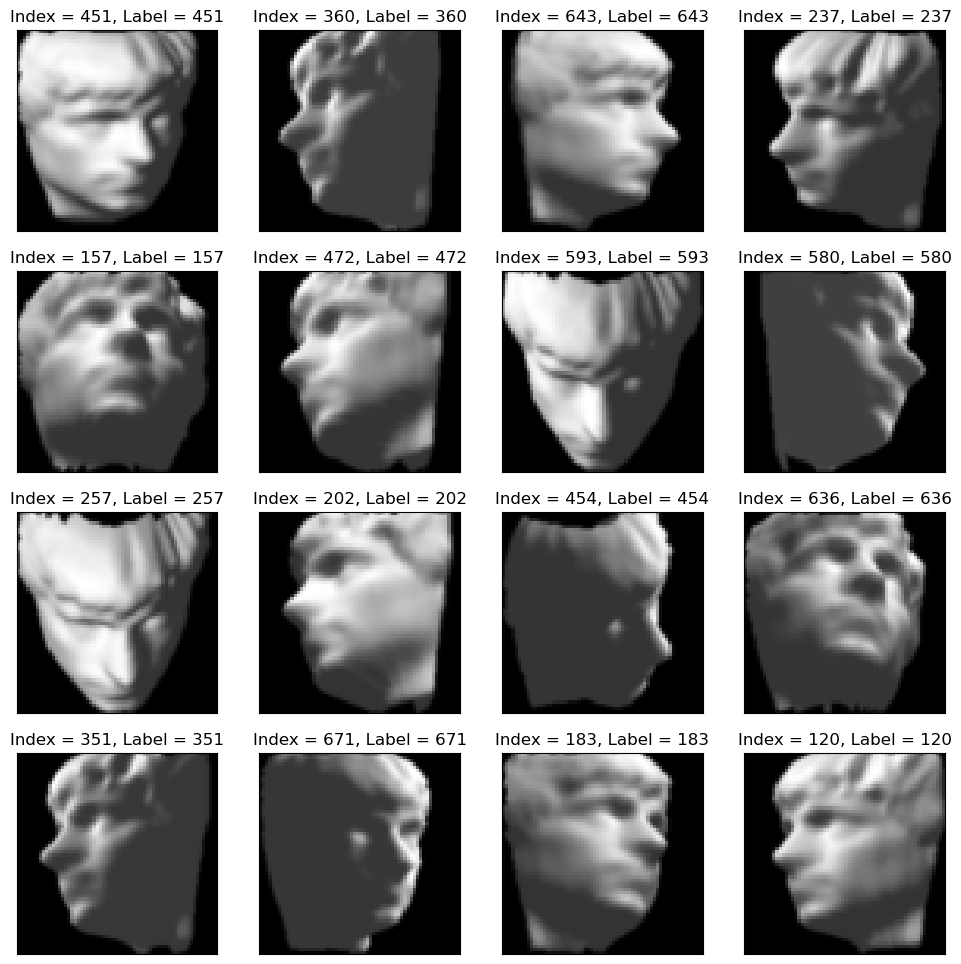

In [10]:
# Plot the Data

hF = PlotMnistImages(mX, range(mX.shape[0]), numRows = numRows, numCols = numCols, tuImgSize = tImgSize)

plt.show()

## Applying Dimensionality Reduction - IsoMap

We'll use the IsoMap algorithm to approximate the data native manifold.  

One of the earliest (In ~2000 by Joshua B. Tenenbaum) approaches to manifold learning is the IsoMap algorithm, short for _Isometric Mapping_.  
IsoMap can be viewed as an extension of Multi Dimensional Scaling (MDS) or Kernel PCA.  
IsoMap seeks a lower dimensional embedding which maintains geodesic distances between all points. 

![Isomap](https://github.com/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/19_DimensionalityReduction/Isomap.png?raw=true)

We'll use SciKit Learn's [`Isomap`](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html).

* <font color='brown'>(**#**)</font> The method is based on MDS which means there is no unique solution.
* <font color='brown'>(**#**)</font> The complexity of the algorithm is rather high hence there are many approximated steps.
* <font color='brown'>(**#**)</font> Behind the scene the SciKit Learn implementation approximate the geodesic distance using a Kernel (So the solution is equivalent to K-PCA).



* <font color='red'>(**?**)</font> What do we send in for production from this model?

In [11]:
# Apply the IsoMap

# Construct the object
oIsoMapDr = Isomap(n_neighbors = numNeighbors, n_components = lowDim, metric = metricType)
# Build the model
oIsoMapDr = oIsoMapDr.fit(mX)

* <font color='red'>(**?**)</font> Does this method support out of sample data? Look for `transform()` method.

In [12]:
# Apply the Transform
mZ = oIsoMapDr.transform(mX)

In [13]:
# Plot the Low Dimensional Data (With the Faces)

# Compute Images which are far apart

lSet = list(range(1, numSamples))
lIdx = [0] #<! First image
for ii in range(numSamples - 1):
    mDi  = sp.spatial.distance.cdist(mZ[lIdx, :], mZ[lSet, :])
    vMin = np.min(mDi, axis = 0)
    idx  = np.argmax(vMin) #<! Farthest image
    lIdx.append(lSet[idx])
    lSet.remove(lSet[idx])

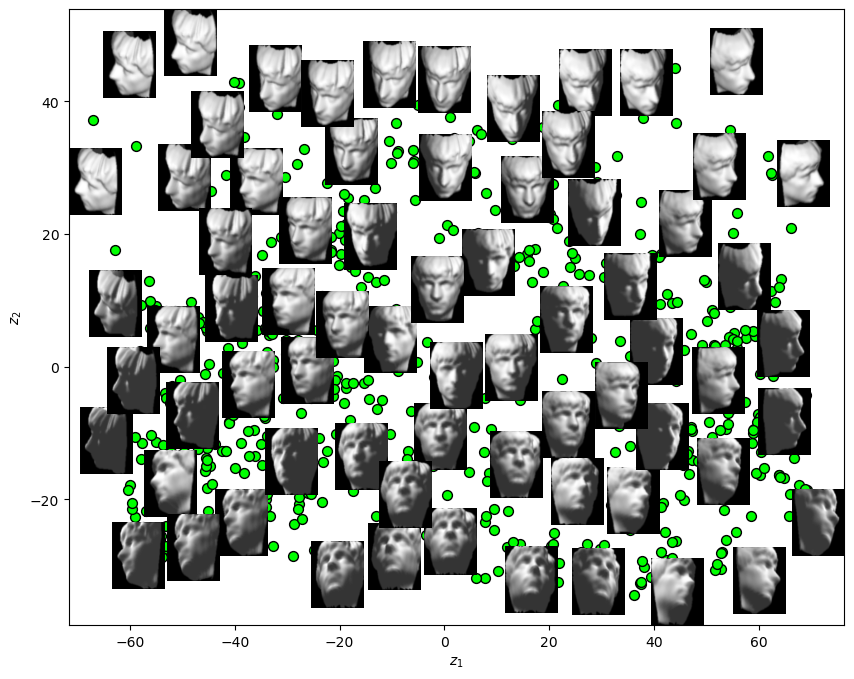

In [14]:
# Plot the Embedding with Images

hF, hA = plt.subplots(figsize = (10, 8))

imgShift = 5
for ii in range(numImgScatter):
    idx = lIdx[ii]
    x0  = mZ[idx, 0] - imgShift
    x1  = mZ[idx, 0] + imgShift
    y0  = mZ[idx, 1] - imgShift
    y1  = mZ[idx, 1] + imgShift
    mI  = np.reshape(mX[idx, :], tImgSize)
    hA.imshow(mI, aspect = 'auto', cmap = 'gray', zorder = 2, extent = (x0, x1, y0, y1))

hA.scatter(mZ[:, 0], mZ[:, 1], s = 50, c = 'lime', edgecolor = 'k')
hA.set_xlabel('$z_1$')
hA.set_ylabel('$z_2$')

plt.show()

* <font color='red'>(**?**)</font> What is the interpretation of ${z}_{1}$? What about ${z}_{2}$?
* <font color='blue'>(**!**)</font> Use Linear PCA to do the above and compare results.